In [1]:
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.tensorboard.plugins import projector

/Users/nathanielschub/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/nathanielschub/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)


INFO:tensorflow:Using /var/folders/s_/bvqcbl7954v3yyk7yxn7bhnw0000gn/T/tfhub_modules to cache modules.


RuntimeError: Missing implementation that supports: loader(*('/var/folders/s_/bvqcbl7954v3yyk7yxn7bhnw0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d',), **{})

In [8]:
tokens_input = [["Argentina", "played", "football", "very", "well","","","",""],
                ["Brazil","is","a","strong","team","","","",""],
                ["Artists","all","over","the","world","are","attending","the","play"],
                ["Child","is","playing","the","guitar","","","",""],
                ["There","was","absolute","silence","during","the","play","",""]]

tokens_length = [5,5,9,5,7]
embeddings = elmo(inputs={"tokens": tokens_input,"sequence_len": tokens_length},
                  signature="tokens",
                  as_dict=True)["elmo"]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
sentence = ['let me tell you the story I like the story']
print(sentence)
sentence.index('story')

AttributeError: 'list' object has no attribute 'split'

In [28]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)



print("Argentina")
print(sess.run(embeddings[0][0]))
x= sess.run(embeddings[0][0])
y = sess.run(embeddings)

print("played")
print(sess.run(embeddings[0][1]))

print("play - Theatre")
print(sess.run(embeddings[4][6]))


Argentina
[-1.08825898e+00 -8.83183181e-01 -1.54190943e-01  8.71523678e-01
  5.53245306e-01  3.44694853e-02  6.16753176e-02 -1.97306573e-02
 -2.33990714e-01  3.39217663e-01  1.59090534e-01  1.18919924e-01
  3.48746210e-01  1.52420044e-01  1.32473558e-01  1.55334085e-01
  1.65431738e-01  6.04489893e-02  2.26848185e-01  5.52049398e-01
 -2.00666904e-01  5.39439060e-02 -3.18995751e-02  4.00188953e-01
  2.31687754e-01  4.83048558e-02 -4.75947410e-01 -9.67652380e-01
  1.44549370e-01  2.54992843e-01 -1.87890515e-01 -4.37788963e-01
 -1.43018916e-01  9.20896232e-02  6.36342317e-02 -1.31977797e-01
 -2.08548918e-01  4.76424024e-02 -1.42104834e-01  9.52667296e-02
 -1.08898595e-01 -2.36889705e-01  1.24700680e-01  3.38348538e-01
  1.77161247e-01  2.71010194e-02  5.03058255e-01  5.60233116e-01
 -2.72292700e-02  1.95609480e-01 -8.80535841e-02 -1.99449547e-02
  7.01794773e-02 -2.79604048e-02  2.75237784e-02 -2.35658586e-01
 -2.89666235e-01  2.07564667e-01 -4.24913943e-01  4.67456341e-01
  1.22801527e-0

ValueError: slice index 4 of dimension 0 out of bounds. for 'strided_slice_144' (op: 'StridedSlice') with input shapes: [2,3,1024], [1], [1], [1] and with computed input tensors: input[1] = <4>, input[2] = <5>, input[3] = <1>.

In [16]:
y = sess.run(embeddings)

In [18]:
print(y.shape)

(5, 9, 1024)


In [26]:
def tsne_plot(embeddings):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    import tensorflow as tf
    import sys
    np.set_printoptions(threshold=sys.maxsize)
    tokens_input = [["Argentina", "played", "football", "very", "well","","","",""],
                ["Brazil","is","a","strong","team","","","",""],
                ["Artists","all","over","the","world","are","attending","the","play"],
                ["Child","is","playing","the","guitar","","","",""],
                ["There","was","absolute","silence","during","the","play","",""]]

    tokens_length = [5,5,9,5,7]
    embeddings = elmo(inputs={"tokens": tokens_input,"sequence_len": tokens_length},
                      signature="tokens",
                      as_dict=True)["elmo"]



    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    sent = ["Argentina", "played", "football", "very", "well"]
    sent1 = ["Brazil","is","a","strong","team"]
    sent2 = ["Artists","all","over","the","world","are","attending","the","play"]
    sent3 = ["Child","is","playing","the","guitar"]
    sent4 = ["There","was","absolute","silence","during","the","play"]
    

    for i in range(len(sent)):
        tokens.append(sess.run(embeddings[0][i]))
        labels.append(sent[i])  
    for i in range(len(sent1)):
        tokens.append(sess.run(embeddings[1][i]))
        labels.append(sent1[i])
    for i in range(len(sent2)):
        tokens.append(sess.run(embeddings[2][i]))
        labels.append(sent2[i])
    for i in range(len(sent3)):
        tokens.append(sess.run(embeddings[3][i]))
        labels.append(sent3[i])  
    for i in range(len(sent4)):
        tokens.append(sess.run(embeddings[4][i]))
        labels.append(sent4[i])
    
    tsne_model = TSNE(perplexity=6, n_components=2, init='random', n_iter=500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


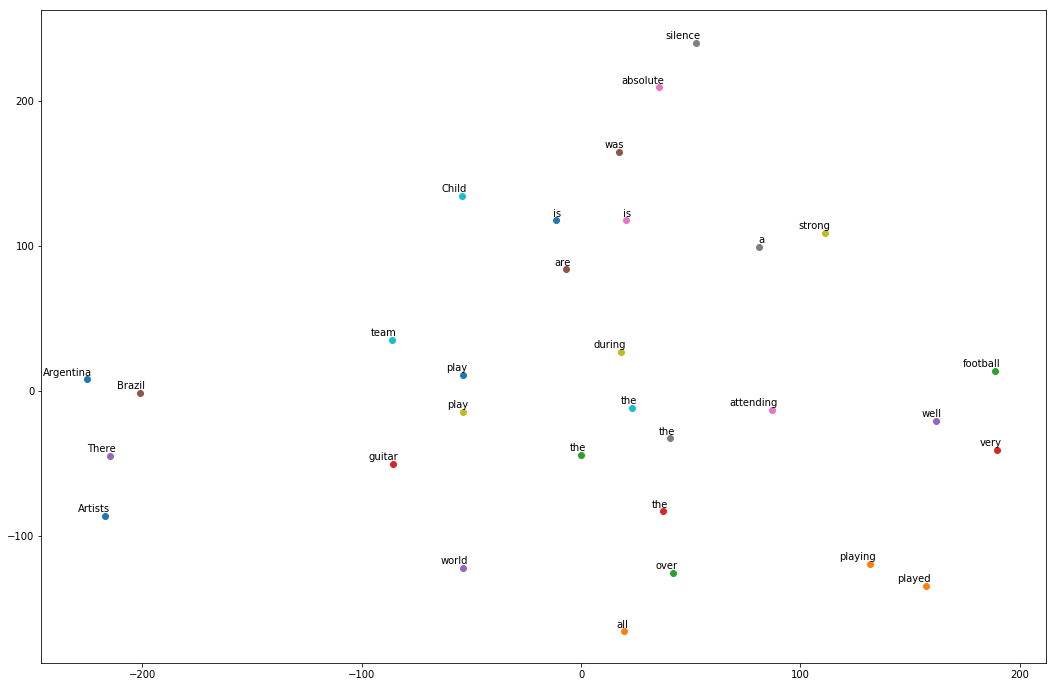

In [27]:
tsne_plot()
